Product Name         object
Price                object
Number of Reviews    object
dtype: object


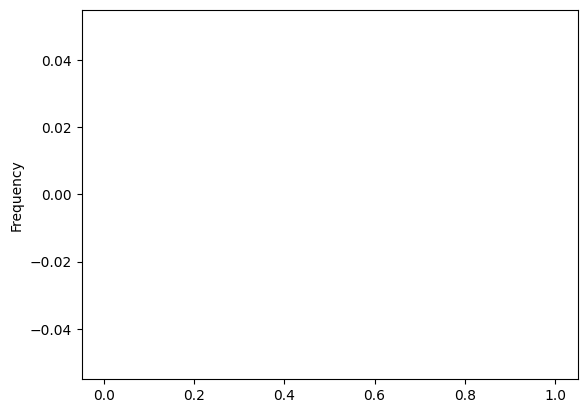

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Scrape the product page for the most popular laptop on Amazon.com
url = 'https://www.jumia.co.ke/smartphones/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the product name, price, and number of reviews
product_name = getattr(soup.find('h1'), 'text', None)
product_price = getattr(soup.find('span', class_='price'), 'text', None)
product_reviews = getattr(soup.find('span', class_='review-count'), 'text', None)

# Create a Pandas Dataframe
data = {
    'Product Name': product_name,
    'Price': product_price,
    'Number of Reviews': product_reviews
}

df = pd.DataFrame(data, index=[0])

# Check the data types of each column
print(df.dtypes)

# Convert the Price column to a numeric data type
df['Price'] = pd.to_numeric(df['Price'])

# Plot the distribution of product prices
df['Price'].plot.hist()

# Define nb as the Jupyter Notebook object
import nbformat
nb = nbformat.v4.new_notebook()

# Save the Jupyter Notebook to a file
with open('jumia_scraper.ipynb', 'w') as f:
    f.write(nbformat.writes(nb))